# Perceptron algorithm (exercise)

In this exercise, implement a single neuron (perceptron) that classifies two groups of flowers from the Iris dataset.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, a linear discriminant model can be developed to distinguish the species from each other.

For the purpose of this exercise, you will only use two features (sepal length and sepal width) of two species of flowers (Setosa and Versicolor).

In [1]:
# allows inline plotting below each cell
%matplotlib inline

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [39]:
# write a function that plots data and linear classifier

def plot_border(w1, b, data, fig):
    plt.grid()
    
    for i in range (len(data)):
        point = data[i]
    
    plt.scatter(point[0], point[1])
    
    #line of best fit
    
    x = np.linspace(0,10,100)
    plt.plot(x , w1*x+b, '-g', label = 'y')
    plt.show

In [35]:
# write a prediction function: 0 for Iris-setosa and 1 for Iris-versicolor
def guess_flower(SepalLength, SepalWidth) :
    predict = SepalLength * w1 + SepalWidth * w2 + bias
    if (predict < 0):
        print('Iris-setosa')
    else:
        print('Iris-versicolor')


In [36]:
#load data
dataset = load_iris()

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa & 1 for Versicolor
training_data = [[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]]

test_data = [[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]]

training_data = np.array(training_data)

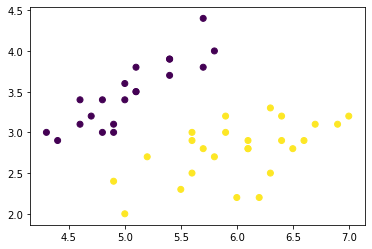

In [37]:
### visualize training data in 2D ###
plt.scatter(training_data[:,0] , training_data[:,1] , c =  training_data[:,2] )

# x-axis: sepal length, y-axis: sepl width
# use 2 colors to visualize 2 different classes of data 


IndexError: invalid index to scalar variable.

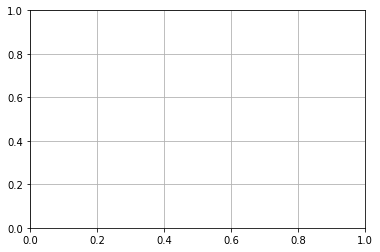

In [48]:
### training loop ###

# initialize weights (set bias to zero)
w1 = np.random.rand()
w2 = np.random.rand()
bias = 0

fig = plt.figure()

for i in range(100):
    idx = np.random.randint(0, len(training_data[:,0]))
#     print("idx: ", idx)

    point = training_data[idx, :]
#     print("point: ", point)

    if point[2] == 1 and (point[0]*w1+point[1]*w2 < 0):
        w1, w2 = w1+point[0], w2+point[1]

    if point[2] == 0 and (point[0]*w1+point[1]*w2 >= 0):
        w1, w2 = w1-point[0], w2-point[1]
        

# write a loop of arbitrary n iterations


# update the weights by randomly selecting a point from the training dataset  

# plot the result after each iteration, and the final result
    plot_border(-w1/w2, -bias/w2, training_data[:,0], fig)
    #display.clear_output(wait=True)
    #time.sleep(0.05)


In [29]:
### evaluation ###

# perform prediction on the test dataset
for i in range(0, len(test_data)):
    point = test_data[i] 
    print (point)
    guess_flower(point[0], point[1])
    

[5.4, 3.4, 0.0]
Iris-setosa
[4.6, 3.6, 0.0]
Iris-setosa
[5.1, 3.3, 0.0]
Iris-setosa
[4.8, 3.4, 0.0]
Iris-setosa
[5.0, 3.0, 0.0]
Iris-setosa
[5.0, 3.4, 0.0]
Iris-setosa
[5.2, 3.5, 0.0]
Iris-setosa
[5.2, 3.4, 0.0]
Iris-setosa
[4.7, 3.2, 0.0]
Iris-setosa
[4.8, 3.1, 0.0]
Iris-setosa
[5.4, 3.4, 0.0]
Iris-setosa
[5.2, 4.1, 0.0]
Iris-setosa
[5.5, 4.2, 0.0]
Iris-setosa
[4.9, 3.1, 0.0]
Iris-setosa
[5.0, 3.2, 0.0]
Iris-setosa
[5.5, 3.5, 0.0]
Iris-setosa
[4.9, 3.1, 0.0]
Iris-setosa
[4.4, 3.0, 0.0]
Iris-setosa
[5.1, 3.4, 0.0]
Iris-setosa
[5.0, 3.5, 0.0]
Iris-setosa
[4.5, 2.3, 0.0]
Iris-versicolor
[4.4, 3.2, 0.0]
Iris-setosa
[5.0, 3.5, 0.0]
Iris-setosa
[5.1, 3.8, 0.0]
Iris-setosa
[4.8, 3.0, 0.0]
Iris-setosa
[5.1, 3.8, 0.0]
Iris-setosa
[4.6, 3.2, 0.0]
Iris-setosa
[5.3, 3.7, 0.0]
Iris-setosa
[5.0, 3.3, 0.0]
Iris-setosa
[6.8, 2.8, 1.0]
Iris-versicolor
[6.7, 3.0, 1.0]
Iris-versicolor
[6.0, 2.9, 1.0]
Iris-versicolor
[5.7, 2.6, 1.0]
Iris-versicolor
[5.5, 2.4, 1.0]
Iris-versicolor
[5.5, 2.4, 1.0]
Iris-ver

In [ ]:
### plot the evaluation result ###
